In [28]:
# Importing required Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
import sklearn.metrics as sm

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Load the Iris data set

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Check for any missing values

print(df.isnull().sum(), end='\n\n')

# Identifying non-numeric data types

df.info()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
# Using Label encoder from sklearn

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [32]:
# Dropping ID column

df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Producing Scatter plots for each Feature

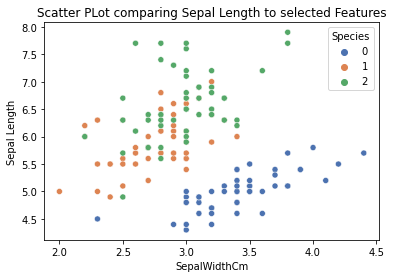

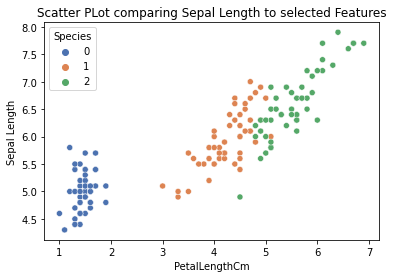

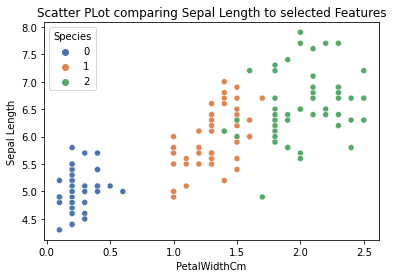

In [33]:
# Compare Sepal Length

for f in df.columns[1:-1]:
    sns.scatterplot(x=df[f], y=df['SepalLengthCm'], hue=df['Species'], palette='deep')
    plt.xlabel(f)
    plt.ylabel('Sepal Length')
    plt.title('Scatter PLot comparing Sepal Length to selected Features')
    plt.show()

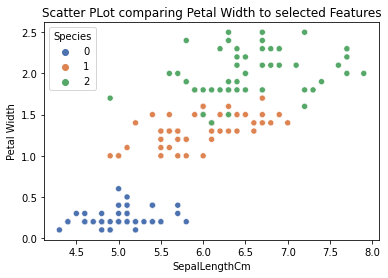

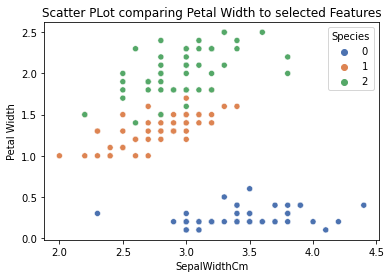

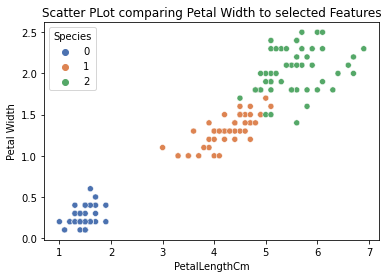

In [34]:
# Compare Petal Width

for f in df.columns[0:3]:
    sns.scatterplot(x=df[f], y=df['PetalWidthCm'], hue=df['Species'], palette='deep')
    plt.xlabel(f)
    plt.ylabel('Petal Width')
    plt.title('Scatter PLot comparing Petal Width to selected Features')
    plt.show()

From the above visualizations, in terms of clustering, we see that Petal Width vs Petal Length and Sepal Length vs Petal Length have strong indications of grouping. There after Petal Width vs Sepal Width shows to indicate relatively strong clustering

For this task, I will want to employ K-means on:

    1. Petal Width vs Petal Length
    2. Sepal Length vs Petal Length

### Implemening K-means model

#### Petal Width vs Petal Length

In [35]:
# Preparing Data for clustering

X = df[['PetalWidthCm', 'PetalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(150, 2)


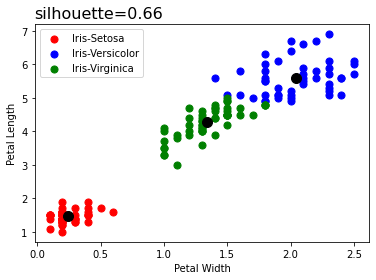

In [36]:
# Producing scatter plot to represent our k-means cluster
# k = 3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label = 'Iris-Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'black')

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='left', fontdict={'fontsize': 16})
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [37]:
print("Accuracy Score : ",(accuracy_score(df['Species'],y_kmeans)*100))

Accuracy Score :  37.333333333333336


#### Sepal Lengh vs Petal Length

In [38]:
# Preparing Data for clustering

X = df[['SepalLengthCm', 'PetalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(150, 2)


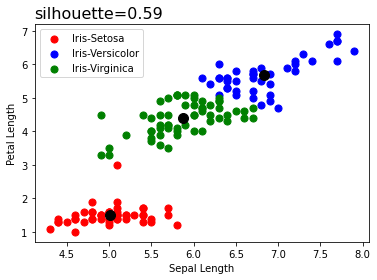

In [39]:
# Producing scatter plot to represent our k-means cluster
# k = 3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label = 'Iris-Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'black')

score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='left', fontdict={'fontsize': 16})
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [40]:
print("Accuracy Score : ",(accuracy_score(df['Species'],y_kmeans)*100))

Accuracy Score :  44.666666666666664
